In [5]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Xopt class, TNK test function

This is the class method for running Xopt. Use Bayesian exploration to explore the input space.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [6]:
# Import the class
from xopt import Xopt

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [7]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: null, verbose: true}

algorithm:
  name: bayesian_exploration
  options:  
      n_initial_samples: 5
      n_steps: 25
      verbose: True
      generator_options:                     ## options for bayesian exploration acquisition function
          batch_size: 1                      ## batch size for parallelized optimization
          #sigma: [[0.01, 0.0], [0.0,0.01]]   ## proximal biasing term
          use_gpu: False

  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  name: TNK_test
  description: null
  simulation: test_TNK
  templates: null
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

if SMOKE_TEST:
    config['algorithm']['options']['n_steps'] = 3
    config['algorithm']['options']['generator_options']['num_restarts'] = 2
    config['algorithm']['options']['generator_options']['raw_samples'] = 2

In [8]:
X = Xopt(config)
X

INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.
INFO:xopt.tools:Loading config from dict.


{'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'None'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'linked_variables': None, 'constants': {'a': 'dummy_constant'}}
{'xopt': {'output_path': None, 'logging': 20}, 'algorithm': {'name': 'bayesian_exploration', 'options': {'n_initial_samples': 5, 'n_steps': 25, 'verbose': True, 'generator_options': {'batch_size': 1, 'use_gpu': False}}, 'function': 'xopt.bayesian.algorithms.bayesian_exploration', 'n_initial_samples': 5, 'n_steps': 25, 'verbose': True, 'generator_options': {'batch_size': 1, 'use_gpu': False}, 'output_path': None, 'custom_model': None, 'executor': None, 'restart_file': None, 'initial_x': None}, 'simulation': {'name': 'test_TNK', 'function': 'xopt.tests.evaluators.TNK.evaluate_TNK', 'options': {'templates': None, 'extra_option': 'abc'}, 'evaluate': 'xopt.tests.evaluators.TNK.evaluate_TNK'}, 'vocs': {'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1'


            Xopt 
________________________________           
Version: 0.4.3+168.g7d48d79.dirty
Configured: True
Config as YAML:
xopt: {output_path: null, logging: 20}
algorithm:
  name: bayesian_exploration
  options:
    n_initial_samples: 5
    n_steps: 25
    verbose: true
    generator_options: {batch_size: 1, use_gpu: false}
  function: xopt.bayesian.algorithms.bayesian_exploration
  n_initial_samples: 5
  n_steps: 25
  verbose: true
  generator_options: {batch_size: 1, use_gpu: false}
  output_path: null
  custom_model: null
  executor: null
  restart_file: null
  initial_x: null
simulation:
  name: test_TNK
  function: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {templates: null, extra_option: abc}
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: null
  constants: {a: dummy_constant}

# Run BayesOpt

In [9]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [10]:
# Change max generations
X.run(executor=executor)

INFO:xopt.xopt:Starting at time 2021-09-24T11:16:44-05:00
INFO:xopt.bayesian.optimize:started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x0000018FC48FC7C0>
INFO:xopt.bayesian.optimize:submitting initial candidates at time 2021-09-24T11:16:44-05:00
INFO:xopt.bayesian.optimize:starting optimization loop
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:46-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:47-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:48-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:50-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:51-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:52-05:00
INFO:xopt.bayesian.optimize:submitting candidates at time 2021-09-24T11:16:54-05:00
INFO:xopt.bayesian.optimize:submittin

# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


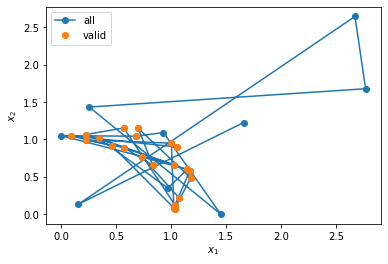

In [11]:


import matplotlib.pyplot as plt
%matplotlib inline

# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()

results = X.results
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o', label = 'all')
ax.plot(valid[:, 0], valid[:, 1], 'o', label = 'valid')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

plt.show()